# San Francisco Airport - Clustering

<div style="text-align:center">
<img src=" ER3SPbm24dxCnxDLslRQ0R2ixaTdXWesTG4jHY7HF7HQzmc+CAHaKSkTaCB9OWOx2Ow2Sf/2Q==" width=400>
</div>

## Load and EDA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",600)
pd.set_option("display.max_rows",100)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

In [35]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [3]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 18885
Features     -------> 12
Shape of dataset: (18885, 12)
************************* TYPES OF FEATURES **************************
Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object 

******************************** INFO ********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Acti

In [6]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Operating Airline,18885,89,United Airlines - Pre 07/01/2013,2154
Operating Airline IATA Code,18822,82,UA,3807
Published Airline,18885,79,United Airlines - Pre 07/01/2013,2645
Published Airline IATA Code,18822,73,UA,4649
GEO Summary,18885,2,International,11904
GEO Region,18885,9,US,6981
Activity Type Code,18885,3,Enplaned,8930
Price Category Code,18885,2,Other,16521
Terminal,18885,5,International,11963
Boarding Area,18885,8,A,6679


## Handling Missing Values and Feature Engineering

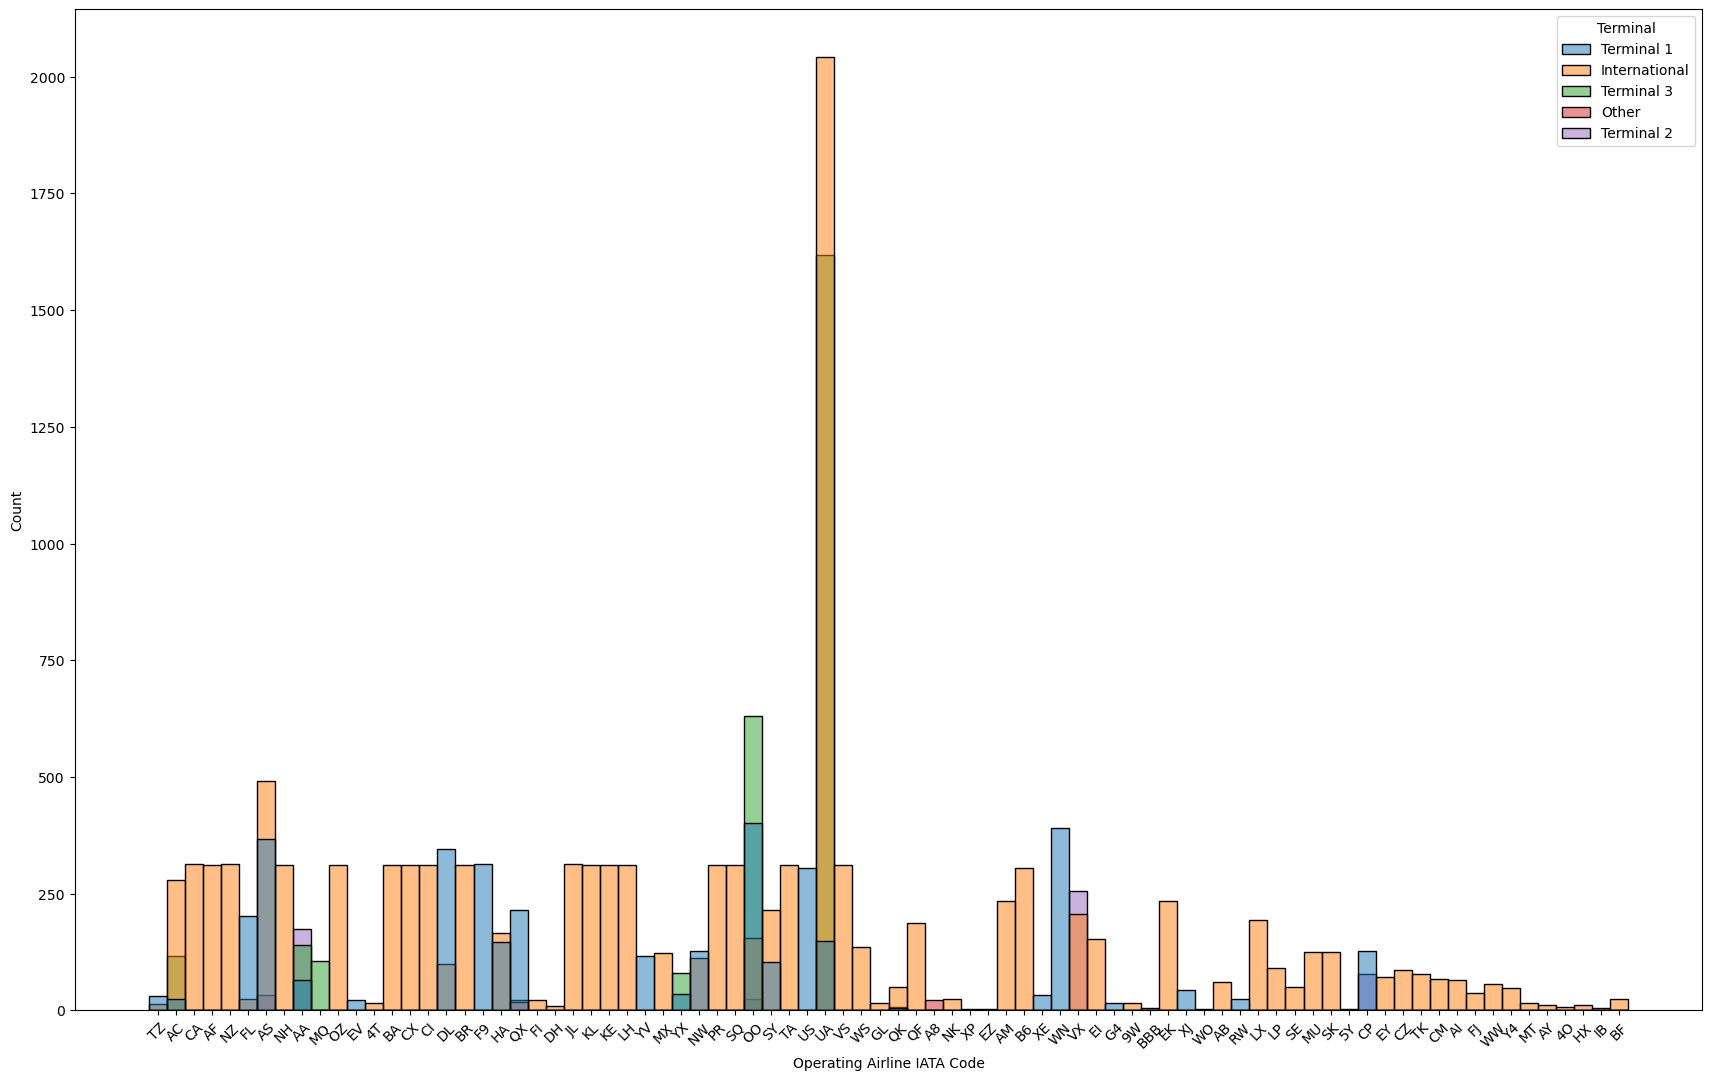

In [10]:
plt.figure(figsize=(21,13))
plt.xticks(rotation=45)
sns.histplot(x=df["Operating Airline IATA Code"], hue=df["Terminal"]);

In [36]:
df["Activity Period"] = pd.to_datetime(df["Activity Period"],format="%Y%m")

In [37]:
df["Month"] = df["Activity Period"].dt.month
df["Year"] = df["Activity Period"].dt.year

In [41]:
df = df.drop(["Operating Airline IATA Code","Published Airline IATA Code","Activity Period"], axis=1)

<Axes: xlabel='Year', ylabel='Passenger Count'>

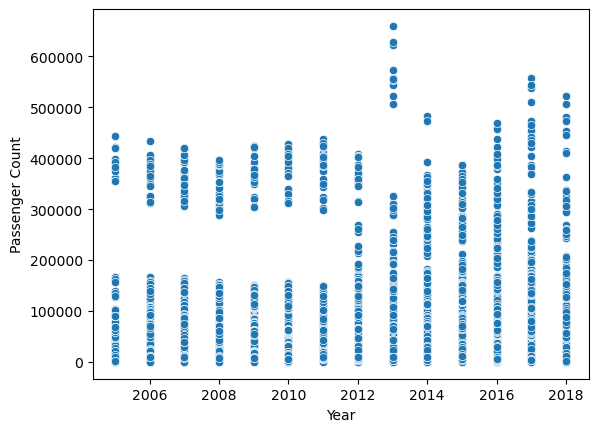

In [46]:
sns.scatterplot(df, x="Year", y="Passenger Count")

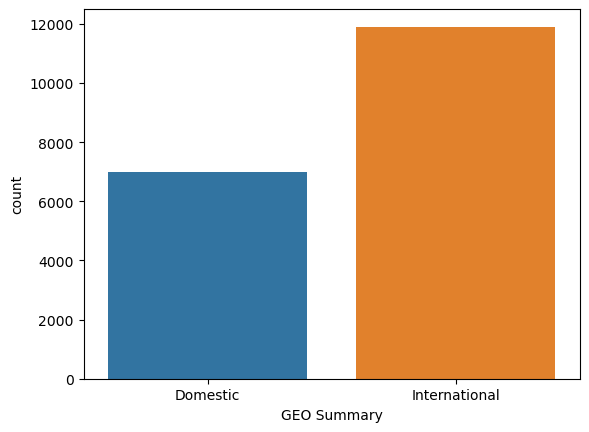

In [49]:
sns.countplot(x=df["GEO Summary"]);

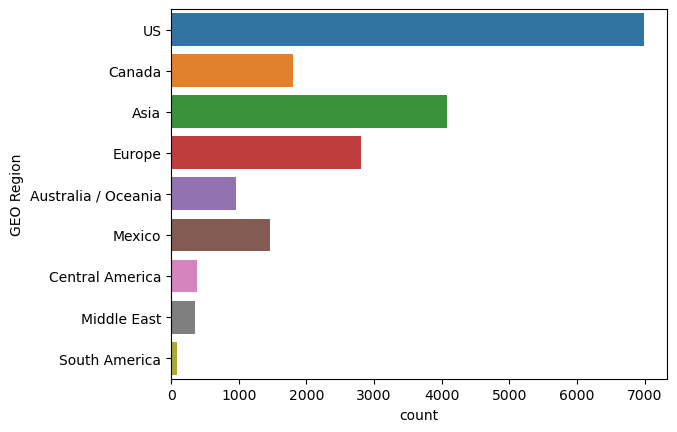

In [51]:
sns.countplot(y=df["GEO Region"]);

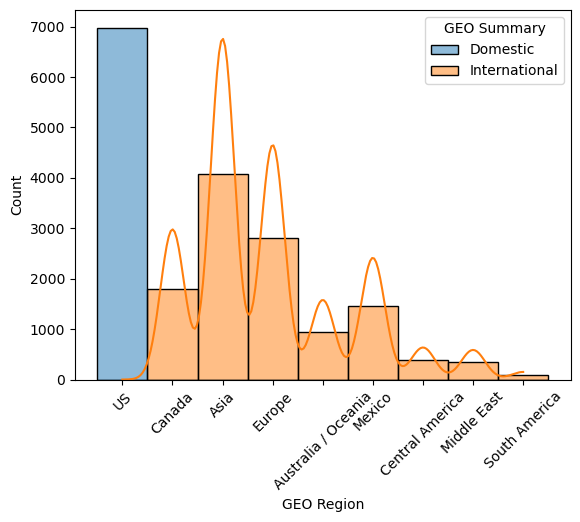

In [54]:
plt.figure()
plt.xticks(rotation=45)
sns.histplot(df, x="GEO Region", hue="GEO Summary", kde=True);

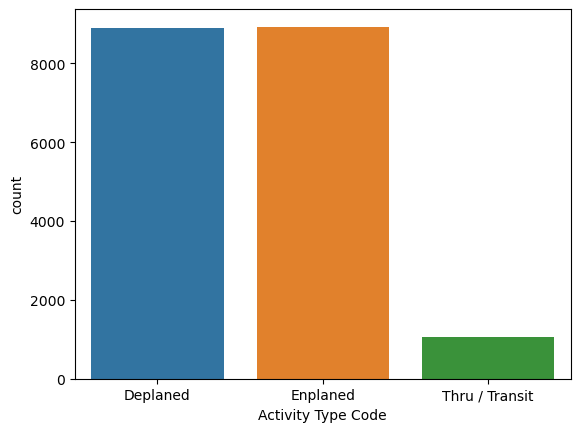

In [56]:
sns.countplot(x=df["Activity Type Code"]);

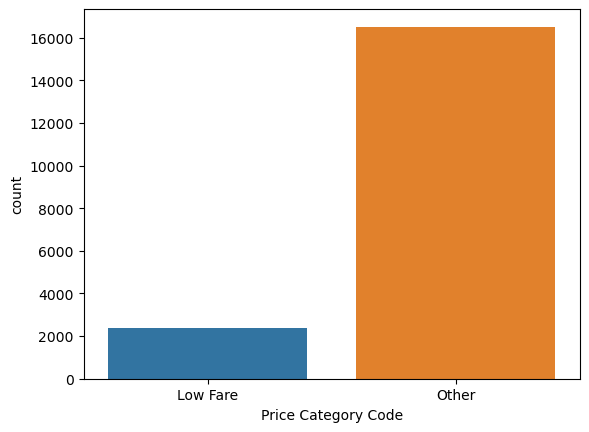

In [57]:
sns.countplot(x=df["Price Category Code"]);

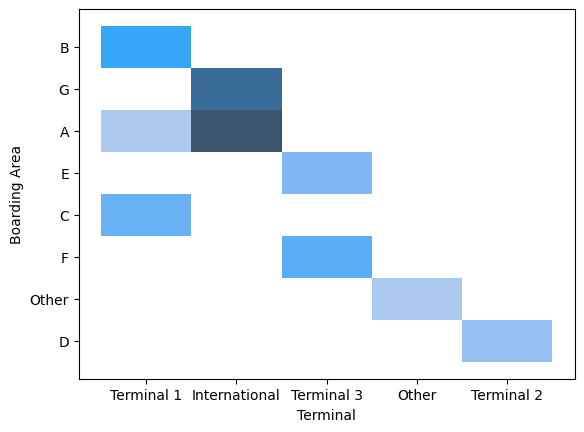

In [59]:
sns.histplot(df, x="Terminal", y="Boarding Area");

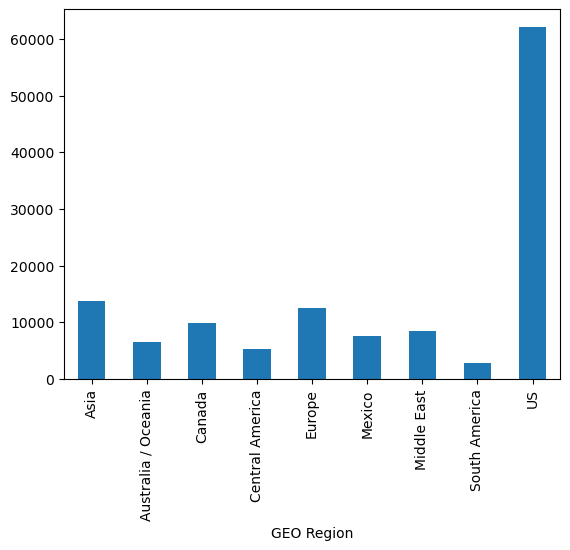

In [67]:
df.groupby("GEO Region")["Passenger Count"].mean().plot.bar();

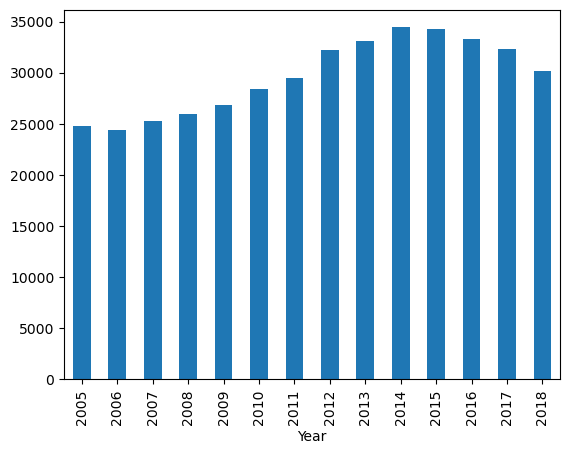

In [69]:
df.groupby("Year")["Passenger Count"].mean().plot.bar();

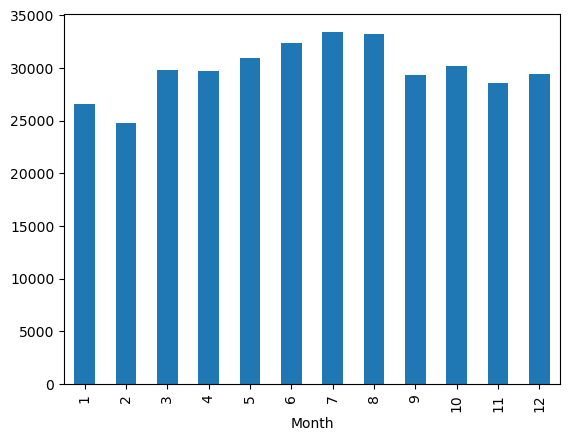

In [70]:
df.groupby("Month")["Passenger Count"].mean().plot.bar();

In [ ]:
July is the month with the highest number of passengers

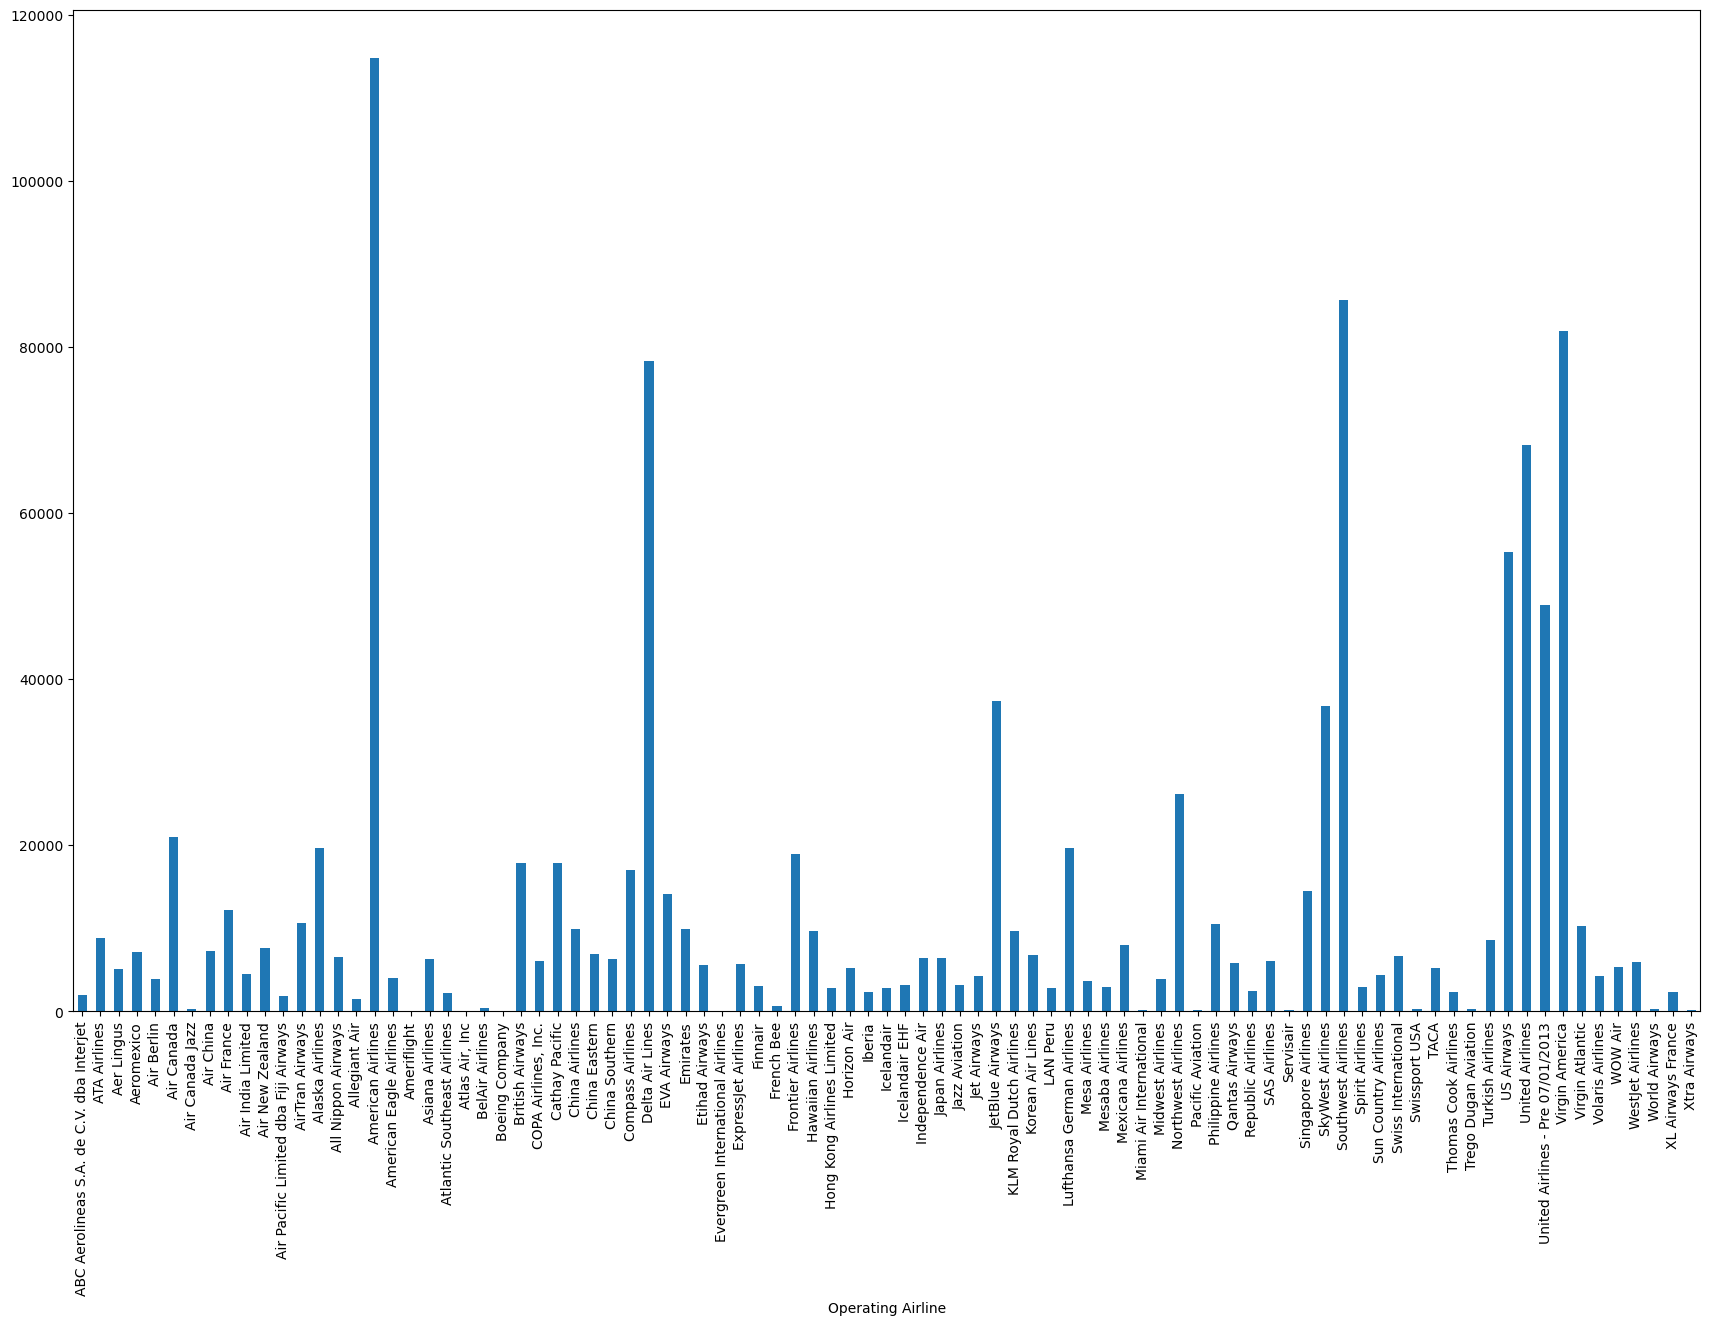

In [72]:
plt.figure(figsize=(21,13))
plt.xticks(rotation=45)
df.groupby("Operating Airline")["Passenger Count"].mean().plot.bar();

## Data Preprocessing

In [73]:
df = pd.get_dummies(df, drop_first=True)

## Modelling

In [95]:
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [96]:
prediction = model.predict(df)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
df["cluster"] = prediction
df.sample(7)

,Passenger Count,Month,Year,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Published Airline_ATA Airlines,Published Airline_Aer Lingus,Published Airline_Aeromexico,Published Airline_Air Berlin,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air India Limited,Published Airline_Air New Zealand,Published Airline_Air Pacific Limited dba Fiji Airways,Published Airline_AirTran Airways,Published Airline_Alaska Airlines,Published Airline_All Nippon Airways,Published Airline_Allegiant Air,Published Airline_American Airlines,Published Airline_Ameriflight,Published Airline_Asiana Airlines,"Published Airline_Atlas Air, Inc",Published Airline_BelAir Airlines,Published Airline_Boeing Company,Published Airline_British Airways,"Published Airline_COPA Airlines, Inc.",Published Airline_Cathay Pacific,Published Airline_China Airlines,Published Airline_China Eastern,Published Airline_China Southern,Published Airline_Delta Air Lines,Published Airline_EVA Airways,Published

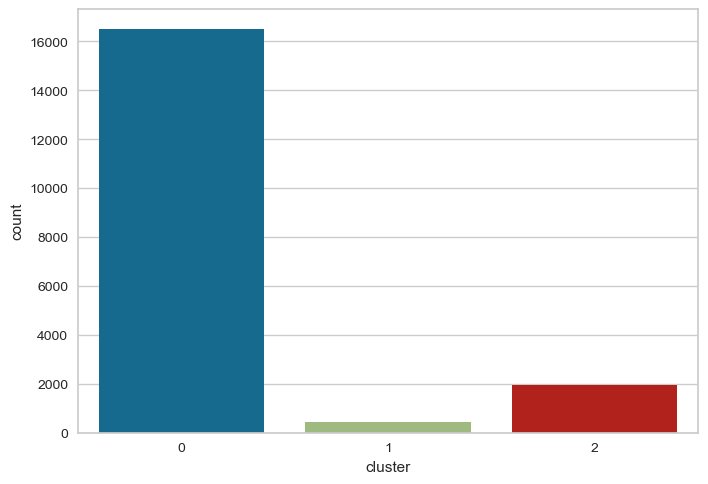

In [98]:
sns.countplot(x=df["cluster"]);

In [99]:
df[df["cluster"] == 0]

,Passenger Count,Month,Year,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Published Airline_ATA Airlines,Published Airline_Aer Lingus,Published Airline_Aeromexico,Published Airline_Air Berlin,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air India Limited,Published Airline_Air New Zealand,Published Airline_Air Pacific Limited dba Fiji Airways,Published Airline_AirTran Airways,Published Airline_Alaska Airlines,Published Airline_All Nippon Airways,Published Airline_Allegiant Air,Published Airline_American Airlines,Published Airline_Ameriflight,Published Airline_Asiana Airlines,"Published Airline_Atlas Air, Inc",Published Airline_BelAir Airlines,Published Airline_Boeing Company,Published Airline_British Airways,"Published Airline_COPA Airlines, Inc.",Published Airline_Cathay Pacific,Published Airline_China Airlines,Published Airline_China Eastern,Published Airline_China Southern,Published Airline_Delta Air Lines,Published Airline_EVA Airways,Published

In [100]:
silhouette_score(df,prediction)

0.8285979517474725

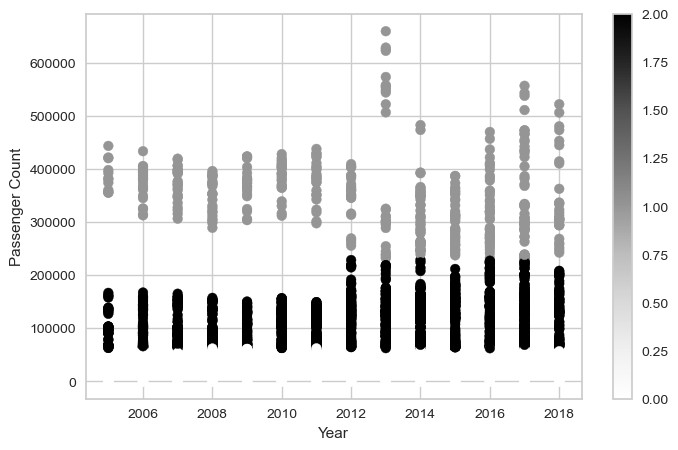

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(df["Year"], df["Passenger Count"], c=prediction)
plt.colorbar()
plt.xlabel("Year")
plt.ylabel("Passenger Count");

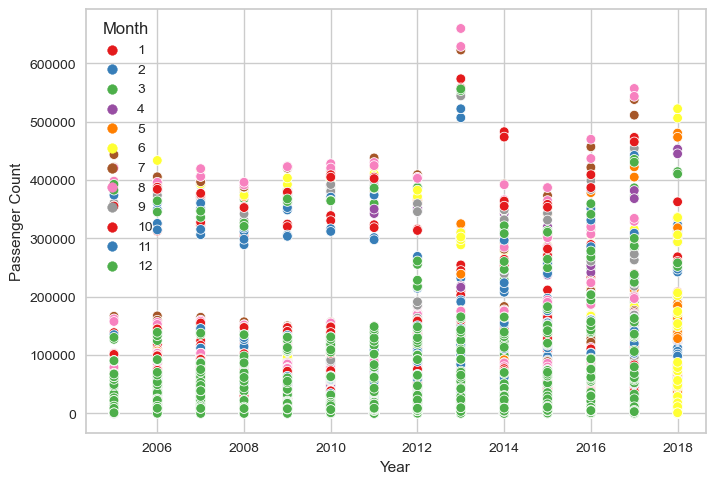

In [102]:
sns.scatterplot(y=df['Passenger Count'], x=df['Year'], hue=df['Month'], palette='Set1');

In [103]:
wcss = [] #within cluster sum of squares
ss = []
for i in range(2, 11):
    model = KMeans(i)
    model = model.fit(df)
    predictions = model.predict(df)
    ss1 = silhouette_score(df, predictions)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.8596461065096332
0.8285979517474725
0.7863336812995674
0.78463439987353
0.66124717796022
0.6617447624224155
0.6435580842964796
0.6400685114532948
0.6130416655148465


Text(0, 0.5, 'WCSS')

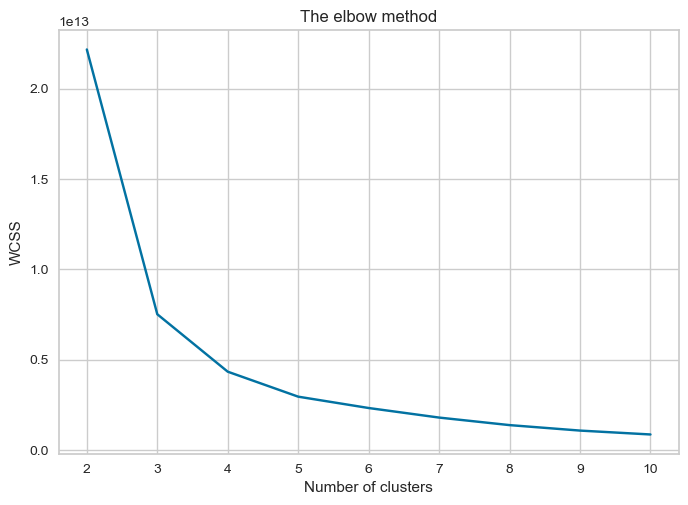

In [104]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

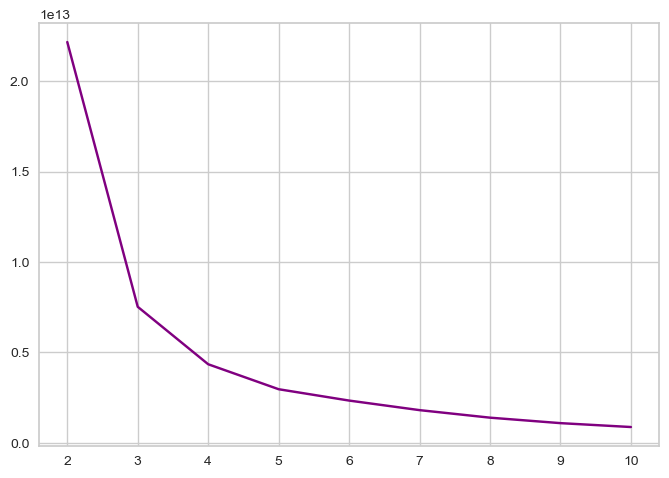

In [105]:
sns.lineplot(x=range(2, 11), y=wcss, markers="*", color="purple");

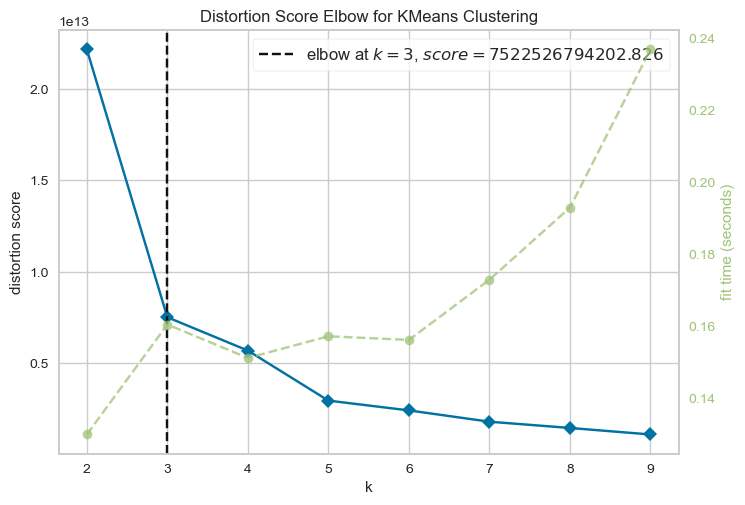

In [106]:

km = KMeans(random_state=42)
vis = KElbowVisualizer(km, k=(2,10))
vis.fit(df)
vis.show();